# Multi-Agent DDPG

### Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### Train a MADDPG agent


Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from maddpg import MADDPG
from collections import deque
import torch
agent = MADDPG(24, 2, 0)

In [6]:
env_info = env.reset(train_mode=True)[brain_name]
env_info.vector_observations.shape

(2, 24)

In [7]:
def maddpg(max_episodes=2000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, max_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = 0
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.max(rewards)
            if any(dones):
                break 
                
        
        scores_deque.append(score)
        scores.append(score)
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, scores[-1], np.mean(scores_deque)))

        if len(scores_deque) == 100 and np.mean(scores_deque) >= 1.0:
            if i_episode % print_every != 0:
                print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, scores[-1], np.mean(scores_deque)))
            print('Done! Yay!')
            break

    return scores

scores = maddpg()

Episode 10	Score: 0.10	Average Score: 0.01
Episode 20	Score: 0.00	Average Score: 0.01
Episode 30	Score: 0.00	Average Score: 0.00
Episode 40	Score: 0.00	Average Score: 0.00
Episode 50	Score: 0.00	Average Score: 0.00
Episode 60	Score: 0.00	Average Score: 0.00
Episode 70	Score: 0.00	Average Score: 0.00
Episode 80	Score: 0.00	Average Score: 0.00
Episode 90	Score: 0.00	Average Score: 0.00
Episode 100	Score: 0.00	Average Score: 0.00
Episode 110	Score: 0.00	Average Score: 0.00
Episode 120	Score: 0.00	Average Score: 0.00
Episode 130	Score: 0.00	Average Score: 0.00
Episode 140	Score: 0.00	Average Score: 0.00
Episode 150	Score: 0.00	Average Score: 0.00
Episode 160	Score: 0.00	Average Score: 0.00
Episode 170	Score: 0.00	Average Score: 0.00
Episode 180	Score: 0.00	Average Score: 0.00
Episode 190	Score: 0.00	Average Score: 0.00
Episode 200	Score: 0.00	Average Score: 0.00
Episode 210	Score: 0.00	Average Score: 0.00
Episode 220	Score: 0.00	Average Score: 0.00
Episode 230	Score: 0.00	Average Score: 0.

### Plot the Training Scores

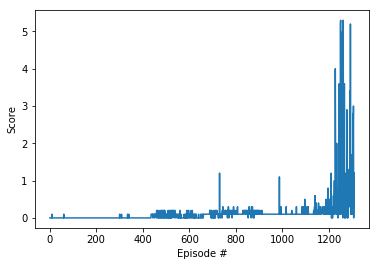

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('scores.png')

### Watch the Trained Agents Play

In [9]:
def watch_trained_agent():
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    agent.reset()
    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        states = next_states
        if any(dones):
            break

In [10]:
watch_trained_agent()